In [4]:
import pandas as pd
import requests

# all csv files are uploaded to GitHub
# They are all merged to create data frames
# some custom processing due to slight change in the format

base_url = "https://github.com/trungsi/DS-project---Road-accidents-in-France/blob/master/"

# read carateristiques
dfs = []
for y in range(2006, 2009):
    dfs.append(pd.read_csv(base_url + 'caracteristiques_' + str(y) + '.csv?raw=true', sep=',', encoding='ISO-8859-1'))

dfs.append(pd.read_csv(base_url + 'caracteristiques_' + str(2009) + '.csv?raw=true', sep='\t', encoding='ISO-8859-1'))

for y in range(2010, 2017):
    dfs.append(pd.read_csv(base_url + 'caracteristiques_' + str(y) + '.csv?raw=true', sep=',', encoding='ISO-8859-1'))

for y in range(2017, 2019):
    dfs.append(pd.read_csv(base_url + 'caracteristiques-' + str(y) + '.csv?raw=true', sep=',', encoding='ISO-8859-1'))

for y in range(2019, 2022):
    dfs.append(pd.read_csv(base_url + 'caracteristiques-' + str(y) + '.csv?raw=true', sep=';', encoding='ISO-8859-1'))

df_carac = pd.concat(dfs)
df_carac.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,200600000001,6,1,4,1545,1,2,2,1.0,3.0,53,"SANS N°, PONT DES CHEVRE",NaN,NaN,NaN,10
1,200600000002,6,1,6,805,2,2,2,4.0,3.0,53,BROU ( BD DU N° 47 A 65,NaN,NaN,NaN,10
2,200600000003,6,1,9,1340,1,2,1,1.0,6.0,53,"sans, CLAVAGRY ( RUE)",NaN,NaN,NaN,10
3,200600000004,6,1,10,1625,2,2,1,8.0,3.0,53,23EME R.I. ( RUE DU),NaN,NaN,NaN,10
4,200600000005,6,1,24,1120,1,1,1,1.0,2.0,53,MARBOZ (AVENUEDE - IMPAI,NaN,NaN,NaN,10


In [5]:
# cleanse the data
# convert department column to correct format

print(df_carac.dep.unique())
df_carac = df_carac.astype({"dep": str})

def clean_deps(r):
    if ((len(r) == 3) & (r.endswith('0'))):
        return r[0:-1]
    if (len(r) == 1):
        return '0' + r
    if r == '201':
        return '2A'
    if r == '202':
        return '2B'
    return r

df_carac.dep = df_carac.dep.apply(clean_deps)
print('number of departments = ', len(df_carac.dep.unique()))

df_carac.info()

[10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 210
 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390
 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570
 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750
 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930
 940 950 201 202 972 971 973 974 976 '93' '92' '94' '87' '69' '38' '34'
 '13' '988' '976' '974' '972' '2B' '91' '86' '83' '80' '78' '77' '76' '72'
 '71' '67' '66' '64' '60' '51' '50' '49' '45' '37' '35' '33' '31' '30'
 '29' '22' '19' '18' '17' '74' '81' '2' '59' '95' '63' '62' '973' '2A'
 '84' '9' '73' '43' '10' '36' '16' '7' '21' '40' '24' '4' '85' '27' '28'
 '52' '68' '42' '82' '11' '987' '44' '61' '14' '56' '58' '54' '47' '41'
 '3' '75' '1' '57' '32' '39' '15' '23' '6' '5' '26' '48' '986' '971' '89'
 '25' '12' '88' '65' '53' '70' '46' '90' '8' '79' '977' '55' '978' '975'
 '06' '03' '07' '01' '08' '02' '05' '04' '09']
number o

  department  acc_count
0         75     107065
1         13      61996
2         93      45316
3         92      40764
4         94      39841


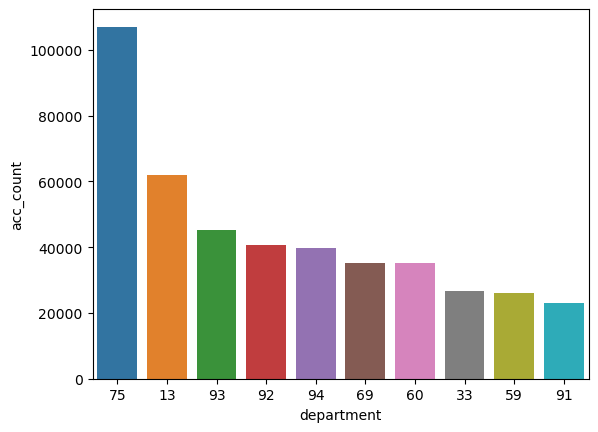

In [6]:
import seaborn as sns

dep_count = df_carac.dep.value_counts()
dep_count = dep_count.to_frame().reset_index().rename(columns={'dep': 'acc_count', 'index': 'department'})
print(dep_count.head())
sns.barplot(x='department', y='acc_count', data=dep_count.head(10), order=dep_count.head(10).department);

In [7]:
# read lieux
dfs = []
for y in range(2006, 2019):
    dfs.append(pd.read_csv(base_url + 'lieux_' + str(y) + '.csv?raw=true', sep=',', encoding='ISO-8859-1'))
for y in range(2019, 2022):
    dfs.append(pd.read_csv(base_url + 'lieux_' + str(y) + '.csv?raw=true', sep=';', encoding='ISO-8859-1'))

df_lieux = pd.concat(dfs)
print(df_lieux.head())
print(df_lieux.v1.unique())
print(df_lieux.v2.unique())

print(df_lieux.info(show_counts=True))

D:\ProgramFiles\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3221: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


        Num_Acc  catr voie   v1   v2  circ  nbv    pr    pr1  vosp  prof  \
0  200600000001     2  0.0  0.0  NaN   3.0  4.0   NaN    NaN   0.0   1.0   
1  200600000002     3  0.0  0.0  NaN   3.0  4.0   1.0  590.0   0.0   1.0   
2  200600000003     4  0.0  0.0  NaN   0.0  1.0   NaN    NaN   0.0   1.0   
3  200600000004     4  0.0  0.0  NaN   2.0  2.0   NaN    NaN   0.0   1.0   
4  200600000005     3  0.0  0.0  NaN   2.0  2.0  27.0   50.0   2.0   1.0   

   plan lartpc larrout  surf  infra  situ  env1  vma  
0   1.0      0     150   1.0    0.0   1.0  99.0  NaN  
1   1.0      0      80   2.0    5.0   1.0  99.0  NaN  
2   1.0      0      37   1.0    0.0   4.0  99.0  NaN  
3   1.0      0      80   2.0    0.0   1.0   3.0  NaN  
4   1.0      0     100   1.0    0.0   1.0  99.0  NaN  
[ 0. nan  7.  1.  2.  3.  4.  5.  6.  8.  9. -1.]
[nan 'A' '\x04' 'D' 'E' 'J' 'L' 'b' 'a' 'N' 'S' 'F' 'C' 'K' 'G' 'R' 'Q'
 's' 'M' 'P' 'W' 'e' 'B' 'V' 'I' 'd' 'c' 'H' 'z' 'U' 'Z' 'v' 'O' 'm' 'Y'
 'T' 'w' 'y' '1' '

In [8]:
# read vehicules
dfs = []
for y in range(2006, 2019):
    dfs.append(pd.read_csv(base_url + 'vehicules_' + str(y) + '.csv?raw=true', sep=',', encoding='ISO-8859-1'))
for y in range(2019, 2022):
    dfs.append(pd.read_csv(base_url + 'vehicules_' + str(y) + '.csv?raw=true', sep=';', encoding='ISO-8859-1'))

df_vehicules = pd.concat(dfs)
print(df_vehicules.head())
print(df_vehicules.info(show_counts=True))

        Num_Acc  senc  catv  occutc   obs  obsm  choc  manv num_veh  \
0  200600000001   0.0     7     0.0  11.0   2.0   6.0   1.0     B01   
1  200600000001   0.0    13     0.0   0.0   2.0   1.0  15.0     A01   
2  200600000002   0.0     7     0.0   0.0   2.0   3.0  15.0     A01   
3  200600000002   0.0     7     0.0   0.0   2.0   3.0   1.0     B01   
4  200600000003   0.0    10     0.0   0.0   1.0   4.0   4.0     A01   

  id_vehicule  motor  
0         NaN    NaN  
1         NaN    NaN  
2         NaN    NaN  
3         NaN    NaN  
4         NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1765138 entries, 0 to 97314
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Num_Acc      1765138 non-null  int64  
 1   senc         1764866 non-null  float64
 2   catv         1765138 non-null  int64  
 3   occutc       1488304 non-null  float64
 4   obs          1764132 non-null  float64
 5   obsm       

In [10]:
df_num_veh = df_vehicules.groupby('Num_Acc').count()
print(df_num_veh.sort_values(by=['num_veh'], ascending=[False]).head())
#sns.countplot(df_num_veh, x='num_veh')

              senc  catv  occutc  obs  obsm  choc  manv  num_veh  id_vehicule  \
Num_Acc                                                                         
200600074917    56    56      56   56    56    56    56       56            0   
201100052545    54    54      54   25    50    42    27       54            0   
200600016834    44    44      44   44    44    44    44       44            0   
201600002473    35    35      35   35    35    35    35       35            0   
200900022411    28    28      28   28    28    28    28       28            0   

              motor  
Num_Acc              
200600074917      0  
201100052545      0  
200600016834      0  
201600002473      0  
200900022411      0  


In [11]:
# read usagers
dfs = []
for y in range(2006, 2019):
    dfs.append(pd.read_csv(base_url + 'usagers_' + str(y) + '.csv?raw=true', sep=',', encoding='ISO-8859-1'))
for y in range(2019, 2022):
    dfs.append(pd.read_csv(base_url + 'usagers_' + str(y) + '.csv?raw=true', sep=';', encoding='ISO-8859-1'))
    
df_usagers = pd.concat(dfs)
print(df_usagers.head())
print(df_usagers.info(show_counts=True))
print(df_usagers.grav.unique())

        Num_Acc  place  catu  grav  sexe  trajet  secu  locp actp  etatp  \
0  200600000001    1.0     1     4     1     5.0  11.0   0.0    0    0.0   
1  200600000001    2.0     2     4     2     0.0  11.0   0.0    0    0.0   
2  200600000001    1.0     1     1     2     5.0  11.0   0.0    0    0.0   
3  200600000002    1.0     1     4     2     1.0  11.0   0.0    0    0.0   
4  200600000002    1.0     1     4     2     2.0  11.0   0.0    0    0.0   

   an_nais num_veh id_vehicule  secu1  secu2  secu3  
0   1949.0     B01         NaN    NaN    NaN    NaN  
1   1948.0     B01         NaN    NaN    NaN    NaN  
2   1921.0     A01         NaN    NaN    NaN    NaN  
3   1972.0     A01         NaN    NaN    NaN    NaN  
4   1984.0     B01         NaN    NaN    NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312122 entries, 0 to 129152
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Num_Acc      2

In [12]:
usagers_counts = df_usagers.groupby('Num_Acc')['Num_Acc'].count().sort_values(ascending=False).head(10)
print('top 10 accidents with most victimes\n', usagers_counts)

top 10 accidents with most victimes
 Num_Acc
200600016834    86
200600074917    84
200600072991    73
201200012891    68
200700051728    64
201600002473    63
201100052545    61
201200012460    61
201700018713    59
200800007145    58
Name: Num_Acc, dtype: int64


In [13]:
df_merged = df_usagers \
            .merge(df_vehicules, on=['Num_Acc', 'num_veh']) \
            .merge(df_lieux, on='Num_Acc') \
            .merge(df_carac, on='Num_Acc')

print(df_merged.head())
print(df_merged.info(show_counts=True))

        Num_Acc  place  catu  grav  sexe  trajet  secu  locp actp  etatp  ...  \
0  200600000001    1.0     1     4     1     5.0  11.0   0.0    0    0.0  ...   
1  200600000001    2.0     2     4     2     0.0  11.0   0.0    0    0.0  ...   
2  200600000001    1.0     1     1     2     5.0  11.0   0.0    0    0.0  ...   
3  200600000002    1.0     1     4     2     1.0  11.0   0.0    0    0.0  ...   
4  200600000002    1.0     1     4     2     2.0  11.0   0.0    0    0.0  ...   

   agg int  atm  col  com                       adr  gps  lat  long  dep  
0    2   2  1.0  3.0   53  SANS N°, PONT DES CHEVRE  NaN  NaN   NaN   10  
1    2   2  1.0  3.0   53  SANS N°, PONT DES CHEVRE  NaN  NaN   NaN   10  
2    2   2  1.0  3.0   53  SANS N°, PONT DES CHEVRE  NaN  NaN   NaN   10  
3    2   2  4.0  3.0   53   BROU ( BD DU N° 47 A 65  NaN  NaN   NaN   10  
4    2   2  4.0  3.0   53   BROU ( BD DU N° 47 A 65  NaN  NaN   NaN   10  

[5 rows x 58 columns]
<class 'pandas.core.frame.DataFrame'>
In

In [14]:
# some columns (eg:secu1, secu2, secu3,motor, v1, v2, pr, pr1, vma, gps, lat, long) have a lot of missing values, so exclude thoses from the model
df_merged = df_merged.drop(columns=['secu1', 'secu2', 'secu3', 'motor', 'v1', 'v2', 'pr', 'pr1', 'vma', 'gps', 'lat', 'long'])
df_merged.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312230 entries, 0 to 2312229
Data columns (total 46 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Num_Acc        2312230 non-null  int64  
 1   place          2189102 non-null  float64
 2   catu           2312230 non-null  int64  
 3   grav           2312230 non-null  int64  
 4   sexe           2312230 non-null  int64  
 5   trajet         2311736 non-null  float64
 6   secu           1888140 non-null  float64
 7   locp           2255869 non-null  float64
 8   actp           2255768 non-null  object 
 9   etatp          2255812 non-null  float64
 10  an_nais        2307432 non-null  float64
 11  num_veh        2312230 non-null  object 
 12  id_vehicule_x  367553 non-null   object 
 13  senc           2311900 non-null  float64
 14  catv           2312230 non-null  int64  
 15  occutc         1949092 non-null  float64
 16  obs            2311169 non-null  float64
 17  obsm    

In [16]:
# add features: age

def get_an(an):
  if an < 2000:
    return 2000 + an
  return an


df_merged['age'] = df_merged.an.apply(get_an) - df_merged.an_nais
print(df_merged.age.describe().apply(lambda x: format(x, 'f')))

count    2307432.000000
mean          37.736782
std           18.408919
min            0.000000
25%           23.000000
50%           34.000000
75%           50.000000
max          120.000000
Name: age, dtype: object


In [17]:
# remove not useful columns
df_merged = df_merged.drop(columns=[
                  # code, id columns
                  'Num_Acc', 'num_veh', 'id_vehicule_x', 'id_vehicule_y',
                  # address is free text so will most likely be unique. Remove it for now
                  'adr', 'voie', 'nbv', 'vosp',
                  # there're around 1000 communes (categories). So training will be very slow. Remove it for now
                  'com',
                  # remove time variables for now
                  'an', 'mois', 'jour', 'hrmn', 'an_nais'
                  ])
df_merged.info(show_counts=True)

for col in df_merged.columns:
  print(col, df_merged[col].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312230 entries, 0 to 2312229
Data columns (total 33 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   place    2189102 non-null  float64
 1   catu     2312230 non-null  int64  
 2   grav     2312230 non-null  int64  
 3   sexe     2312230 non-null  int64  
 4   trajet   2311736 non-null  float64
 5   secu     1888140 non-null  float64
 6   locp     2255869 non-null  float64
 7   actp     2255768 non-null  object 
 8   etatp    2255812 non-null  float64
 9   senc     2311900 non-null  float64
 10  catv     2312230 non-null  int64  
 11  occutc   1949092 non-null  float64
 12  obs      2311169 non-null  float64
 13  obsm     2311375 non-null  float64
 14  choc     2311926 non-null  float64
 15  manv     2311818 non-null  float64
 16  catr     2312230 non-null  int64  
 17  circ     2308661 non-null  float64
 18  prof     2307787 non-null  float64
 19  plan     2306824 non-null  float64
 20  la

env1 [99.  3.  0. nan]
lum [ 1  2  3  5  4 -1]
agg [2 1]
int [ 2  1  9  3  4  6  5  8  7  0 -1]
atm [ 1.  4.  8.  3.  9.  2.  7.  6.  5. nan -1.]
col [ 3.  6.  2.  7.  1.  4.  5. nan -1.]
dep ['10' '20' '30' '40' '50' '60' '70' '80' '90' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29' '31'
 '32' '33' '34' '35' '36' '37' '38' '39' '41' '42' '43' '44' '45' '46'
 '47' '48' '49' '51' '52' '53' '54' '55' '56' '57' '58' '59' '61' '62'
 '63' '64' '65' '66' '67' '68' '69' '71' '72' '73' '74' '75' '76' '77'
 '78' '79' '81' '82' '83' '84' '85' '86' '87' '88' '89' '91' '92' '93'
 '94' '95' '2A' '2B' '972' '971' '973' '974' '976' '988' '02' '09' '07'
 '04' '987' '03' '01' '06' '05' '986' '08' '977' '978' '975']
age [ 57.  58.  85.  34.  22.  51.  47.  73.  13.  25.  49.  26.  23.  83.
  21.  38.   7.  30.  39.  41.  56.  46.  31.  86.  59.  71.  20.  29.
  90.  80.  37.  61.  89.  52.  27.  19.  16.  18.  53.   5.  64.  44.
  60.  70.  45.  33.  67.  24. 

In [18]:
import math

str_columns = df_merged.columns.drop(['age', 'lartpc', 'larrout', 'occutc'])
print(str_columns)

df_merged[str_columns] = df_merged[str_columns].astype(str)
df_merged = df_merged.replace(['-1', ' -1', 'nan', '-1.0', '0'], '0.0').replace(math.nan, 0)

def transform_row(row):
  return row.apply(lambda v: float(v.replace(',', '.')) if type(v) == str else v)

df_merged[['lartpc', 'larrout', 'occutc']] = (
  df_merged[['lartpc', 'larrout', 'occutc']].apply(transform_row))

df_merged.info(show_counts=True)

for col in df_merged.columns:
  print(col, df_merged[col].unique())

Index(['place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp', 'actp',
       'etatp', 'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'catr', 'circ',
       'prof', 'plan', 'surf', 'infra', 'situ', 'env1', 'lum', 'agg', 'int',
       'atm', 'col', 'dep'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312230 entries, 0 to 2312229
Data columns (total 33 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   place    2312230 non-null  object 
 1   catu     2312230 non-null  object 
 2   grav     2312230 non-null  object 
 3   sexe     2312230 non-null  object 
 4   trajet   2312230 non-null  object 
 5   secu     2312230 non-null  object 
 6   locp     2312230 non-null  object 
 7   actp     2312230 non-null  object 
 8   etatp    2312230 non-null  object 
 9   senc     2312230 non-null  object 
 10  catv     2312230 non-null  object 
 11  occutc   2312230 non-null  float64
 12  obs      2312230 non-null  object 
 13  o

surf ['1.0' '2.0' '7.0' '0.0' '5.0' '9.0' '3.0' '8.0' '6.0' '4.0']
infra ['0.0' '5.0' '4.0' '1.0' '3.0' '2.0' '6.0' '7.0' '9.0' '8.0']
situ ['1.0' '4.0' '0.0' '3.0' '5.0' '2.0' '6.0' '8.0']
env1 ['99.0' '3.0' '0.0']
lum ['1' '2' '3' '5' '4' '0.0']
agg ['2' '1']
int ['2' '1' '9' '3' '4' '6' '5' '8' '7' '0.0']
atm ['1.0' '4.0' '8.0' '3.0' '9.0' '2.0' '7.0' '6.0' '5.0' '0.0']
col ['3.0' '6.0' '2.0' '7.0' '1.0' '4.0' '5.0' '0.0']
dep ['10' '20' '30' '40' '50' '60' '70' '80' '90' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29' '31'
 '32' '33' '34' '35' '36' '37' '38' '39' '41' '42' '43' '44' '45' '46'
 '47' '48' '49' '51' '52' '53' '54' '55' '56' '57' '58' '59' '61' '62'
 '63' '64' '65' '66' '67' '68' '69' '71' '72' '73' '74' '75' '76' '77'
 '78' '79' '81' '82' '83' '84' '85' '86' '87' '88' '89' '91' '92' '93'
 '94' '95' '2A' '2B' '972' '971' '973' '974' '976' '988' '02' '09' '07'
 '04' '987' '03' '01' '06' '05' '986' '08' '977' '978' '975']
age [ 

In [19]:
print(df_merged['grav'].value_counts(normalize=True))
df_merged[df_merged.secu.isna()]['grav'].value_counts(normalize=True)

1      0.410367
4      0.363716
3      0.199277
2      0.026613
0.0    0.000026
Name: grav, dtype: float64


Series([], Name: grav, dtype: float64)

In [20]:
columns = df_merged.columns
re_ordered_columns = columns.drop('grav').insert(0, 'grav')
df_merged = df_merged[re_ordered_columns]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312230 entries, 0 to 2312229
Data columns (total 33 columns):
 #   Column   Dtype  
---  ------   -----  
 0   grav     object 
 1   place    object 
 2   catu     object 
 3   sexe     object 
 4   trajet   object 
 5   secu     object 
 6   locp     object 
 7   actp     object 
 8   etatp    object 
 9   senc     object 
 10  catv     object 
 11  occutc   float64
 12  obs      object 
 13  obsm     object 
 14  choc     object 
 15  manv     object 
 16  catr     object 
 17  circ     object 
 18  prof     object 
 19  plan     object 
 20  lartpc   float64
 21  larrout  float64
 22  surf     object 
 23  infra    object 
 24  situ     object 
 25  env1     object 
 26  lum      object 
 27  agg      object 
 28  int      object 
 29  atm      object 
 30  col      object 
 31  dep      object 
 32  age      float64
dtypes: float64(4), object(29)
memory usage: 599.8+ MB


In [21]:
df_merged.to_csv('accidents_for_classification_model_2.csv')